In [1]:
import os
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

base_path = os.getcwd().split('college_basketball')[0]  + 'college_basketball/'
modelDir = base_path + '/models/'
dataDir = base_path + '/data/'
trainingDir = dataDir + 'processed/trainingData/'

## Analysis for Entire Training Set

In [5]:
# Load training data
trainingData = pd.read_csv(dataDir + '/processed/trainingData/teamLevelTrainingData.csv')
print(trainingData.shape)

(2784, 184)


In [6]:
trainingData.head()

team_name  score        date  rank homeAway  top25  \
0               purdue   96.0  01-17-2022   4.0     away      0   
1              belmont   80.0  01-17-2022   NaN     away      0   
2      bethune cookman   63.0  01-17-2022   NaN     away      0   
3  central connecticut   66.0  01-17-2022   NaN     away      0   
4            charlotte   67.0  01-17-2022   NaN     away      0   

                                              gameID   Rk  Rk_opposition  \
0                         01-17-2022-purdue-illinois    4             12   
1  01-17-2022-belmont-southern-illinois-edwardsville   56            275   
2     01-17-2022-bethune-cookman-arkansas-pine-bluff  347            355   
3  01-17-2022-central-connecticut-state-sacred-heart  343            288   
4              01-17-2022-charlotte-florida-atlantic  220            161   

   Conf  ... teamCluster_3 teamCluster_4 teamCluster_5  oppCluster  \
0   B10  ...             0             0             0           1   
1   OVC  ...             0             0             0           5   
2  SWAC  ...             0             0             0           2   
3   NEC  ...             0             0             0           2   
4  CUSA  ...             0             0             0           0   

   oppCluster_0  oppCluster_1  oppCluster_2  oppCluster_3  oppCluster_4  \
0             0             1             0             0             0   
1             0             0             0             0             0   
2             0             0             1             0             0   
3             0             0             1             0             0   
4             1             0             0             0             0   

   oppCluster_5  
0             0  
1             1  
2             0  
3             0  
4             0  

[5 rows x 184 columns]

In [7]:
# Load clustering files
clusterCols = pd.read_csv(modelDir+'clusterCols.csv')
clusterCols.head()

orderedCols
0       AdjEM
1        AdjO
2        AdjD
3        AdjT

In [8]:
# Load Scaler
scaler = pickle.load(open(modelDir+'KPscaler.pkl','rb'))
# Load kMeans Model
kMeans = pickle.load(open(modelDir+'KMeans.pkl','rb'))

In [9]:
# Get columns for scaling - Home Team
homeCluster = trainingData[['AdjEM', 'AdjO', 'AdjD', 'AdjT']].copy()
homeCluster.head()

AdjEM   AdjO   AdjD  AdjT
0  27.23  124.3   97.1  68.1
1  12.50  111.8   99.3  70.1
2 -19.69   90.5  110.2  66.8
3 -18.15   93.2  111.4  68.0
4  -3.76  104.7  108.5  67.3

In [10]:
homeScaled = pd.DataFrame(scaler.transform(homeCluster))
homeScaled.columns = homeCluster.columns
homeScaled.head()

AdjEM      AdjO      AdjD      AdjT
0  2.326111  3.102751 -0.931573 -0.020026
1  1.067807  1.287221 -0.580400  0.755050
2 -1.682010 -1.806442  1.159506 -0.523826
3 -1.550456 -1.414288  1.351055 -0.058780
4 -0.321196  0.256000  0.888145 -0.330057

In [11]:
homeClusterVal = list(kMeans.predict(homeScaled))
homeCluster['homeCluster'] = homeClusterVal
homeCluster.head()

AdjEM   AdjO   AdjD  AdjT  homeCluster
0  27.23  124.3   97.1  68.1            1
1  12.50  111.8   99.3  70.1            1
2 -19.69   90.5  110.2  66.8            2
3 -18.15   93.2  111.4  68.0            2
4  -3.76  104.7  108.5  67.3            0

In [12]:
trainingData['homeCluster'] = homeClusterVal
sub = trainingData[['team_name', 'homeCluster', 'Rk']].copy()

In [23]:
sub[sub['homeCluster'] == 3].head(15)

team_name  homeCluster  Rk
6             drake            3  94
22        murray st            3  45
26       notre dame            3  57
34           towson            3  91
37          wyoming            3  61
79          penn st            3  65
85       cincinnati            3  75
89   louisiana tech            3  73
95        villanova            3   7
102      wichita st            3  89
105       minnesota            3  84
112       villanova            3   6
120        boise st            3  80
124          butler            3  86
134        michigan            3  18

In [14]:
# Get columns for scaling - Home Team
oppCluster = trainingData[['AdjEM_opposition', 'AdjO_opposition', 'AdjD_opposition', 'AdjT_opposition']].copy()
oppScaled = pd.DataFrame(scaler.transform(oppCluster))
oppScaled.columns = oppCluster.columns
oppScaled.head()

/Users/mtetkosk/projects/ncaabb_betting_model/env/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AdjD_opposition
- AdjEM_opposition
- AdjO_opposition
- AdjT_opposition
Feature names seen at fit time, yet now missing:
- AdjD
- AdjEM
- AdjO
- AdjT

  warnings.warn(message, FutureWarning)


AdjEM_opposition  AdjO_opposition  AdjD_opposition  AdjT_opposition
0          2.017728         2.013433        -1.554108        -0.020026
1         -0.726109        -0.847842         0.425234         0.522527
2         -2.232144        -1.574054         2.436501        -0.252549
3         -0.884144        -0.179727         1.462793        -0.136288
4          0.005125         0.415767         0.441196        -0.601334

In [15]:
oppClusterVal = list(kMeans.predict(oppScaled))
oppCluster['oppCluster'] = oppClusterVal
oppCluster.head()

/Users/mtetkosk/projects/ncaabb_betting_model/env/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AdjD_opposition
- AdjEM_opposition
- AdjO_opposition
- AdjT_opposition
Feature names seen at fit time, yet now missing:
- AdjD
- AdjEM
- AdjO
- AdjT

  warnings.warn(message, FutureWarning)


AdjEM_opposition  AdjO_opposition  AdjD_opposition  AdjT_opposition  \
0             23.62            116.8             93.2             68.1   
1             -8.50             97.1            105.6             69.5   
2            -26.13             92.1            118.2             67.5   
3            -10.35            101.7            112.1             67.8   
4              0.06            105.8            105.7             66.6   

   oppCluster  
0           1  
1           5  
2           2  
3           2  
4           0

In [16]:
trainingData['oppCluster'] = oppClusterVal

In [17]:
clusterSub = trainingData[['team_name', 'gameID', 'homeCluster', 'oppCluster', 'score']].copy()
clusterSub.head()

team_name                                             gameID  \
0               purdue                         01-17-2022-purdue-illinois   
1              belmont  01-17-2022-belmont-southern-illinois-edwardsville   
2      bethune cookman     01-17-2022-bethune-cookman-arkansas-pine-bluff   
3  central connecticut  01-17-2022-central-connecticut-state-sacred-heart   
4            charlotte              01-17-2022-charlotte-florida-atlantic   

   homeCluster  oppCluster  score  
0            1           1   96.0  
1            1           5   80.0  
2            2           2   63.0  
3            2           2   66.0  
4            0           0   67.0

In [24]:
clusterSub[clusterSub['team_name'] == 'penn st']

team_name                                gameID  homeCluster  oppCluster  \
79     penn st      01-16-2022-penn-state-ohio-state            3           1   
231    penn st  12-11-2021-penn-state-michigan-state            3           1   
979    penn st         01-11-2022-rutgers-penn-state            3           3   
1128   penn st          01-08-2022-purdue-penn-state            3           1   
1539   penn st         01-02-2022-indiana-penn-state            3           1   
2211   penn st                                   NaN            3           0   
2609   penn st    01-05-2022-penn-state-northwestern            3           3   

      score  
79     56.0  
231    64.0  
979    66.0  
1128   67.0  
1539   61.0  
2211   74.0  
2609   74.0

In [27]:
clusterSub.head()
#print(clusterSub.shape)

team_name                                             gameID  \
0               purdue                         01-17-2022-purdue-illinois   
1              belmont  01-17-2022-belmont-southern-illinois-edwardsville   
2      bethune cookman     01-17-2022-bethune-cookman-arkansas-pine-bluff   
3  central connecticut  01-17-2022-central-connecticut-state-sacred-heart   
4            charlotte              01-17-2022-charlotte-florida-atlantic   

   homeCluster  oppCluster  score  
0            1           1   96.0  
1            1           5   80.0  
2            2           2   63.0  
3            2           2   66.0  
4            0           0   67.0

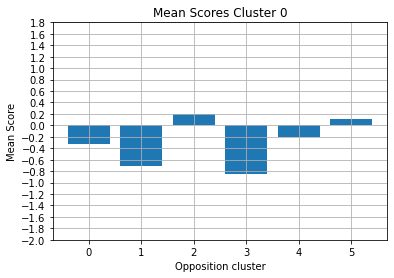

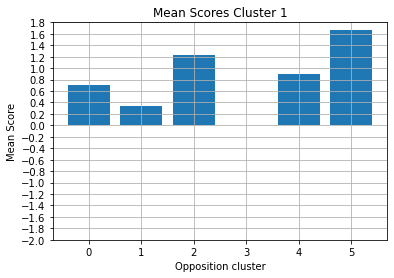

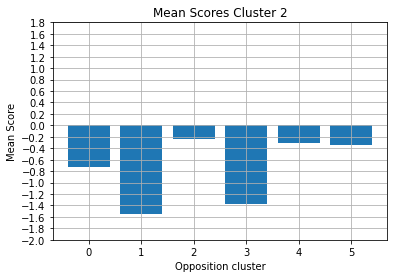

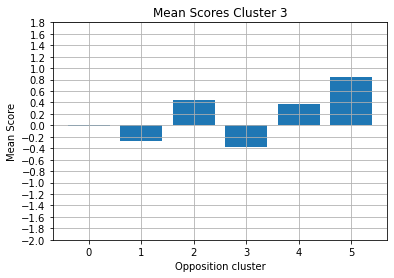

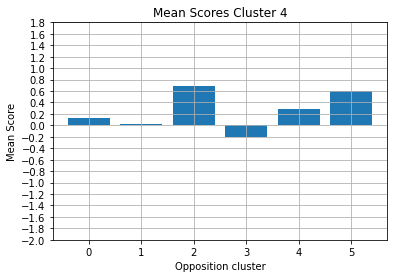

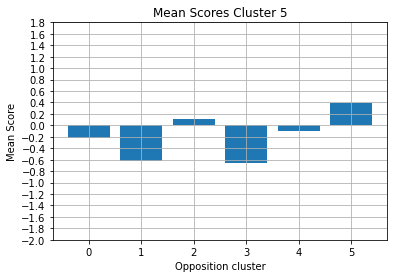

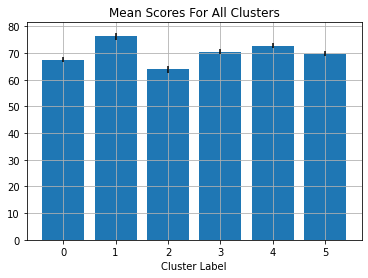

In [34]:
clusterRange = np.arange(0,6,1)
clusterMean = []
mainErrors = []
meanScoreAll = clusterSub['score'].mean()
meanScoreSD = clusterSub['score'].std()

for homeVal in clusterRange:
    homeSub = clusterSub[clusterSub['homeCluster']==homeVal].copy()
    clusterMean.append(homeSub['score'].mean())
    std = homeSub['score'].std()
    error = 1.96*(std/float(np.sqrt(len(homeSub))))
    mainErrors.append(error)
    
    errorBars = []
    meanScores = []
    for oppVal in clusterRange:
        oppSub = homeSub[homeSub['oppCluster'] == oppVal].copy()
        if len(oppSub) == 0:
            meanScores.append(0)
            errorBars.append(0)
        else:
            meanScore = oppSub['score'].mean()
            stdScore = (meanScore - meanScoreAll)/float(meanScoreSD)
            meanScores.append(stdScore)
            std = oppSub['score'].std()
            error = 1.96*(std/float(np.sqrt(len(oppSub))))
            errorBars.append(error)
    
    #plt.bar(clusterRange, meanScores, yerr=errorBars)
    plt.bar(clusterRange, meanScores)
    plt.xticks(clusterRange)
    plt.yticks(np.arange(-2,2,0.2))
    plt.ylabel('Mean Score')
    plt.title('Mean Scores Cluster %d' % homeVal)
    plt.xlabel('Opposition cluster')
    plt.grid()
    plt.show()
    
    


plt.bar(clusterRange, clusterMean, yerr=mainErrors)
plt.xticks(clusterRange)
plt.title('Mean Scores For All Clusters' % homeVal)
plt.xlabel('Cluster Label')
plt.grid()
plt.show()       

## Model Analysis on Train  / Holdout Set

In [ ]:
testDate = '01-19-2022'
train = pd.read_csv(dataDir+ 'processed/trainingData/01-19-2022_trainInput_raw.csv')
print(train.shape)
test = pd.read_csv(dataDir+ 'processed/trainingData/01-19-2022_testInput_raw.csv')
print(test.shape)


In [ ]:
# Get columns for scaling - Projection Team
teamCluster = train[['AdjEM', 'AdjO', 'AdjD', 'AdjT']].copy()
teamScaled = pd.DataFrame(scaler.transform(teamCluster))
teamScaled.columns = teamCluster.columns
teamClusterVal = list(kMeans.predict(teamScaled))
teamCluster['teamCluster'] = teamClusterVal
teamCluster.head()

teamClusterTest = test[['AdjEM', 'AdjO', 'AdjD', 'AdjT']].copy()
teamScaledTest = pd.DataFrame(scaler.transform(teamClusterTest))
teamScaledTest.columns = teamClusterTest.columns
teamClusterValTest = list(kMeans.predict(teamScaledTest))
teamClusterTest['teamCluster'] = teamClusterValTest
teamClusterTest.head()

In [ ]:
# Get columns for scaling - Opposition Team
oppCluster = train[['AdjEM_opposition', 'AdjO_opposition', 'AdjD_opposition', 'AdjT_opposition']].copy()
oppScaled = pd.DataFrame(scaler.transform(oppCluster))
oppScaled.columns = oppCluster.columns
oppClusterVal = list(kMeans.predict(oppScaled))
teamCluster['oppCluster'] = oppClusterVal
teamCluster.head()

oppClusterTest = test[['AdjEM_opposition', 'AdjO_opposition', 'AdjD_opposition', 'AdjT_opposition']].copy()
oppScaledTest = pd.DataFrame(scaler.transform(oppClusterTest))
oppScaledTest.columns = oppClusterTest.columns
oppClusterValTest = list(kMeans.predict(oppScaledTest))
teamClusterTest['oppCluster'] = oppClusterValTest
teamClusterTest.head()

In [ ]:
train['teamCluster'] = teamCluster['teamCluster']
train['oppCluster'] = teamCluster['oppCluster']

test['teamCluster'] = teamClusterTest['teamCluster']
test['oppCluster'] = teamClusterTest['oppCluster']

In [ ]:
# Generate Stats For Each Cluster
clusterMean = {}
MatchupMean = {}

clusterRange = np.arange(0,15,1)

for cluster in clusterRange:
    sub = train[train['teamCluster'] == cluster].copy()
    if len(sub) > 0:
        clusterMean[cluster] = round(sub['score'].mean(),1)
    else:
        clusterMean[cluster] = round(train['score'].mean(),1)
    
    MatchupMean[cluster] = {}
    for oppCluster in clusterRange:
        oppSub = sub[sub['oppCluster'] == oppCluster].copy()
        MatchupMean[cluster][oppCluster] = {}
        
        # Get matchup mean for all games
        if len(oppSub)> 0:
            MatchupMean[cluster][oppCluster]['all'] = round(oppSub['score'].mean(),1)
        else:
            MatchupMean[cluster][oppCluster]['all'] = round(sub['score'].mean(),1)
            
        # Get matchup mean for home games
        oppSubHome = oppSub[oppSub['home_away'] == 1].copy()
        if len(oppSubHome) > 0:
            MatchupMean[cluster][oppCluster]['home'] = round(oppSubHome['score'].mean(),1)
        else:
            MatchupMean[cluster][oppCluster]['home'] = round(sub['score'].mean(),1)
        
        # Get matchup mean for away games
        oppSubAway = oppSub[oppSub['home_away'] == -1].copy()
        if len(oppSubHome) > 0:
            MatchupMean[cluster][oppCluster]['away'] = round(oppSubAway['score'].mean(),1)
        else:
            MatchupMean[cluster][oppCluster]['away'] = round(sub['score'].mean(),1)
            
            
        

In [ ]:
# Now apply the matchup mean to each matchup in the training set
train['clusterMeanScore'] = [clusterMean[x] for x in train['teamCluster']]
test['clusterMeanScore'] = [clusterMean[x] for x in test['teamCluster']]


In [ ]:
# Matchup Mean
matchupVal = []
for ix in range(len(train)):
    teamCluster = train['teamCluster'][ix]
    oppCluster = train['oppCluster'][ix]
    matchupVal.append(MatchupMean[teamCluster][oppCluster]['all'])

train['clusterMatchupScore'] = matchupVal

# Matchup Mean
matchupVal = []
for ix in range(len(test)):
    teamCluster = test['teamCluster'][ix]
    oppCluster = test['oppCluster'][ix]
    matchupVal.append(MatchupMean[teamCluster][oppCluster]['all'])

test['clusterMatchupScore'] = matchupVal

In [ ]:
# Matchup Mean Home/Away
matchupVal = []
for ix in range(len(train)):
    teamCluster = train['teamCluster'][ix]
    oppCluster = train['oppCluster'][ix]
    if train['home_away'][ix] == 1:
        homeScore = MatchupMean[teamCluster][oppCluster]['home']
        if homeScore == homeScore:
            matchupVal.append(homeScore)
        else:
            matchupVal.append(MatchupMean[teamCluster][oppCluster]['all'])
    else:
        awayScore = MatchupMean[teamCluster][oppCluster]['away']
        if awayScore == awayScore:
            matchupVal.append(awayScore)
        else:
            matchupVal.append(MatchupMean[teamCluster][oppCluster]['all'])

train['clusterMatchupScoreHomeAway'] = matchupVal


# Matchup Mean Home/Away
matchupVal = []
for ix in range(len(test)):
    teamCluster = test['teamCluster'][ix]
    oppCluster = test['oppCluster'][ix]
    if test['home_away'][ix] == 1:
        homeScore = MatchupMean[teamCluster][oppCluster]['home']
        if homeScore == homeScore:
            matchupVal.append(homeScore)
        else:
            matchupVal.append(MatchupMean[teamCluster][oppCluster]['all'])
    else:
        awayScore = MatchupMean[teamCluster][oppCluster]['away']
        if awayScore == awayScore:
            matchupVal.append(awayScore)
        else:
            matchupVal.append(MatchupMean[teamCluster][oppCluster]['all'])

test['clusterMatchupScoreHomeAway'] = matchupVal

In [ ]:
train[['score', 'kp_rank_diff_linear_expected_points', 'clusterMeanScore', 'clusterMatchupScore', 'clusterMatchupScoreHomeAway']].head(20)


In [ ]:
# Remove cluster explicit values
del train['teamCluster']
del train['oppCluster']

del test['teamCluster']
del test['oppCluster']

In [ ]:
kpDiff = abs(train['kp_rank_diff_linear_expected_points'] - train['score']).mean()
clusterMeanDiff = abs(train['clusterMeanScore'] - train['score']).mean()
clusterMatchupDiff = abs(train['clusterMatchupScore'] - train['score']).mean()
clusterMatchupDiffHomeAWay = abs(train['clusterMatchupScoreHomeAway'] - train['score']).mean()


diffDF = pd.DataFrame({'method': ['kpDiff', 'clusterDiff', 'matchupDiff', 'matchupDiffHomeAway'],
                       'diff': [kpDiff, clusterMeanDiff, clusterMatchupDiff, clusterMatchupDiffHomeAWay]})

diffDF['diff'].plot(kind='bar')
plt.title('Score Difference By Estimation Method')
plt.xticks(diffDF.index, diffDF['method'])
plt.yticks(np.arange(0,10,0.5))
plt.grid()

This shows that the matchup specific diff is the most accurate of the 4 measures

In [ ]:
# Build models using new features and without to baseline performance
# Remove target column from training set
y_train = train['score'].copy()
del train['score']

y_test = test['score'].copy()
del test['score']

In [ ]:
# Find most important features
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
rf.fit(train, y_train)

In [ ]:
featuresDF = pd.DataFrame({"feature_name": [x for x in train.columns],
                           "importances": list(rf.feature_importances_)}).sort_values("importances", ascending=False).reset_index(drop=True)
print(len(featuresDF))

In [ ]:
importantFeatures = featuresDF[featuresDF['importances']>0].copy()
print('Identified %d important features' %len(importantFeatures))

In [ ]:
importantFeatures.head(41)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from math import sqrt

In [ ]:
## Iterate thru features and apply scaling and non-scaling to test
nonPCAMetric = []
for ix in range(2,len(importantFeatures)):
    featureList = list(importantFeatures['feature_name'])[:ix]
    trainSub = train[featureList].copy()
    testSub = test[featureList].copy()
    
    # Scale columns using standard-scaler
    scaler = StandardScaler()
    scaler.fit(trainSub)
    trainScaled = scaler.transform(trainSub)
    trainScaled = pd.DataFrame(trainScaled)
    trainScaled.columns = trainSub.columns

    testScaled = scaler.transform(testSub)
    testScaled = pd.DataFrame(testScaled)
    testScaled.columns = testSub.columns
    
    # Optimize ElasticNet
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    # define model
    ratios = np.arange(0, 1, 0.01)
    alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,0.25,0.4, 0.5, 0.75, 1.0, 1.5, 10.0, 100.0]
    enModel = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
    # fit model
    enModel.fit(trainScaled, y_train)
    # summarize chosen configuration
    print('alpha: %f' % enModel.alpha_)
    print('l1_ratio_: %f' % enModel.l1_ratio_)
    
    # Train elasticNet Model on data
    model = ElasticNet(alpha=enModel.alpha_, l1_ratio=enModel.l1_ratio_)
    model.fit(trainScaled, y_train)
    preds = model.predict(testScaled)
    rmse = sqrt(mean_squared_error(y_test, preds))
    nonPCAMetric.append(rmse)
    if ix % 50 == 0:
        print('Completed %d iterations' %ix)
        break
print('Finished')

In [ ]:
np.arange(2, len(nonPCAMetric)+2,1)

In [ ]:
plt.plot(np.arange(2, len(nonPCAMetric)+2,1), nonPCAMetric)
plt.xticks(np.arange(2, len(nonPCAMetric)+2,2))
plt.yticks(np.arange(10,11,0.1))
plt.grid()
plt.show()

In [ ]:
# Compute PCA for train / test
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(trainScaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(0,120,10))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('PCA Explained Variance Ratio')

In [ ]:
number_of_features = 93
pca = PCA(n_components = number_of_features)
pca.fit(trainScaled)
trainInput = pd.DataFrame(pca.transform(trainScaled))
testInput = pd.DataFrame(pca.transform(testScaled))

column_names = []
for i in range(1,number_of_features+1):
    column_names.append('PCA_var_%d'%i)
trainInput.columns= column_names
testInput.columns= column_names

In [ ]:
# Optimize Elastic Net
trainCopy = train.copy()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,0.25,0.4, 0.5, 0.75, 1.0, 1.5, 10.0, 100.0]
enModel = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
enModel.fit(trainCopy, y_train)
# summarize chosen configuration
print('alpha: %f' % enModel.alpha_)
print('l1_ratio_: %f' % enModel.l1_ratio_)